# **08 - Naive Bayes**

**Naive Bayes classifiers** are linear classifiers that are known for being simple yet very efficient. The probabilistic model of naive Bayes classifiers is based on **Bayes' theorem**, and the adjective naive comes from the assumption that the features in a dataset are mutually independent. In practice, the independence assumption is often violated, but naive Bayes classifiers still tend to perform very well under this unrealistic assumption. Especially for small sample sizes, naive Bayes classifiers can outperform the more powerful alternatives.

Being relatively robust, easy to implement, fast, and accurate, naive Bayes classifiers are used in many different fields. Some examples include the diagnosis of diseases and making decisions about treatment processes, the classification of RNA sequences in taxonomic studies, and spam filtering in e-mail clients.

However, **strong violations of the independence assumptions** and **non-linear classification problems** can lead to very poor performances of naive Bayes classifiers. We have to keep in mind that the type of data and the type problem to be solved dictate which classification model we want to choose. In practice, it is always recommended to compare different classification models on the particular dataset and consider the prediction performances as well as computational efficiency.

From Bayes Rule, we have:

$$
P(Y=k|X=x) = \frac{p(X=x|Y=k)P(Y=k)}{P(X=x)} = \frac{\pi_{k}f_{k}(x)}{\sum_{l=1}^{K}\pi_{l}f_{l}(x)}
$$

* Where density is $f_{k}(X) = P(X=x|Y=k)$ and prior probability of class $k$ is $\pi_{k} = P(Y=k)$.

Conditional on class $k$, assume the variables $x_{j}$ are independent:

$$
f_{k}(x)= \prod_{j=1}^{p}f_{kj}(x_{j})
$$

Where p is the number of $x$‐variables.

* Independence assumption: Conditional on the outcome, there is no multicollinearity
* This assumption is almost always wrong; but extremely convenient.
* This method is also called "Idiot's Bayes"

Plugging the density into Bayes rule, we obtain:

$$
P(Y=k|X=x) = \frac{\pi_{k}f_{k}(x)}{\sum_{l=1}^{K}\pi_{l}f_{l}(x)}=\frac{\pi_{k}\prod_{j=1}^{p}f_{kj}(x_{j})}{\sum_{l=1}^{K}\pi_{l}\prod_{j=1}^{p}f_{lj}(x_{j})}
$$

The denominator does not depend on class $k$. It is a constant. To find the class that maximizes the posterior probability, we can ignore the denominator:

$$
P(Y=k|X=x) \propto \pi_{k}\prod_{j=1}^{p}f_{kj}(x_{j})
$$

* where $j=1,...,p$ indexes x‐variables

Predict the class $k$ that maximizes the posterior probability(Decision rule):

$$
h(x) = argmax_{k}(P(Y=k)\prod_{j=1}^{p}P(X_{j}=x_{j}|Y=k) = argmax_{k}(\pi_{k}\prod_{j=1}^{p}f_{kj}(x_{j}))
$$

When there are many $x$‐variables, multiplying many small probabilities may result in an "underflow". Numerically, all posterior probabilities are 0. It is unclear which 0 is "largest". We can take the log to avoid this problem. Because it is a monotone function, taking the log does not change which class $k$ gives the maximum posterior probability:

$$
h(x) = argmax_{k}(log(\pi_{k}) + \sum_{j=1}^{p}log[f_{kj}(x_{j})])
$$

Typically, estimate the prior probability as the fraction of time the class occurs in the training data:

$$
\pi_{k} = P(Y=k) = \frac{n_{k}}{n}
$$

Estimate the probability as:

$$
f_{kj}(x_{j}) = P(X_{j}=x_{j}|Y=k) = \frac{n_{kj}}{n_{k}}
$$

   * where $n_{k}$ is the number of obs in class $k$
   * Where $n_{kj}$ is the number of obs in class $k$ taking the value $x_{j}$

### LaPlace Smoothing
For a given $x$‐variable, **LaPlace smoothing** adds one observation to each $x$‐category

$$
f_{kj}(x_{j}) = P(X_{j}=x_{j}|Y=k) = \frac{n_{kj}+1}{n_{k}+d_{j}}
$$

* where $d_{j}$ is the number of categories of the corresponding $x$‐variable

 ### Smoothing in general
 
* The probability estimates “shrink” away from the extremes
* Instead of adding just one observation, we can add an arbitrary number of observations, $L$, that controls the amount of shrinking:

$$
f_{kj}(x_{j}) = P(X_{j}=x_{j}|Y=k) = \frac{n_{kj}+L}{n_{k}+L*d_{j}}
$$

* In the limit, for very large L,

$$
P(X_{j}=x_{j}|Y=k) \to \frac{L}{L*d_{j}} = \frac{1}{d_{j}}
$$

<img src="08_images/8_LaPlace.PNG" width=800px/>

## Gaussian Naive Bayes

Gaussian Naive Bayes classifier assumes that the likelihoods are Gaussian:

$$
f_{kj}(x_{j}) = P(X_{j}=x_{j}|Y=k) =\frac{1}{\sqrt{2\pi\sigma_{jk}^{2}}}exp[\frac{-(x_{j}-\mu_{jk})^{2}}{2\sigma_{jk}}]
$$

* Gaussian Naive Bayes is not as common as the case where all x‐ variables are categorical.
* Maximum likelihood estimate of parameters are:

$$
\begin{align*}
\mu_{jk} &= \frac{\sum_{n=1}^{N}I[Y^{(n)}=k]\cdot x_{j}^{(n)}}{\sum_{n=1}^{N}I[Y^{(n)}=k]} \\
\sigma_{jk} &= \frac{\sum_{n=1}^{N}I[Y^{(n)}=k]\cdot (x_{j}^{(n)}-\mu_{jk})^{2}}{\sum_{n=1}^{N}I[Y^{(n)}=k]} \\
\end{align*}
$$

Let's consider a simple example using the Iris data set:

* There are 3 class labels: Setosa, Versicolor, Virginica which we label as $y\in\{0,1,2\}$
* There are two explanatory variables (features): $X_{1}$: sepal length and $X_{2}$: sepal width.

For each feature, we calculate the estimated class mean, class variance and prior probability
* **Mean:** $\mu_{x_{1}|Y=0}$, $\mu_{x_{1}|Y=1}$, $\mu_{x_{1}|Y=2}$ and $\mu_{x_{2}|Y=0}$, $\mu_{x_{2}|Y=1}$, $\mu_{x_{2}|Y=2}$
* **Variance:** $\sigma_{x_{1}|Y=0}^{2}$, $\sigma_{x_{1}|Y=1}^{2}$, $\sigma_{x_{1}|Y=2}^{2}$ and $\sigma_{x_{2}|Y=0}^{2}$, $\sigma_{x_{2}|Y=1}^{2}$, $\sigma_{x_{2}|Y=2}^{2}$
* **Prior:** $P(Y=0)$, $P(Y=1)$, $P(Y=2)$

For any point $(x1,x2)$ we compute the Gaussian Naive Bayes objective function (i.e. the one we are trying to maximize) for each class :

$$
\begin{align*}
h(x) &= argmax_{k}[P(Y=k)\prod_{j=1}^{2}P(X_{j}=x_{j}|Y=k)] \\
&= argmax_{k}[P(X_{1}=x_{1}|Y=k)P(k)\cdot P(X_{2}=x_{2}|Y=k)P(k)] \\
&= argmax_{k}[\phi(x_{1}|\mu_{x_{1}|k},\sigma_{x_{1}|k}^{2})P(k)\cdot \phi(x_{2}|\mu_{x_{2}|k},\sigma_{x_{2}|k}^{2})P(k)] \\
\end{align*}
$$

* where $\phi(x_{1}|\mu_{x_{1}|k},\sigma_{x_{1}|k}^{2})$ is the PDF of a Gaussian univariate distribution with parameters $\mu_{x_{1}|k}$, $\sigma_{x_{1}|k}^{2}$. Repeat this calculation for each class, and then predict the class which has the highest value.

## Implementing Naive Bayes from sklearn

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['SepalLengthCm'] = pd.to_numeric(iris['SepalLengthCm'])
iris['SepalWidthCm'] = pd.to_numeric(iris['SepalWidthCm'])
iris['PetalLengthCm'] = pd.to_numeric(iris['PetalLengthCm'])
iris['PetalWidthCm'] = pd.to_numeric(iris['PetalWidthCm'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

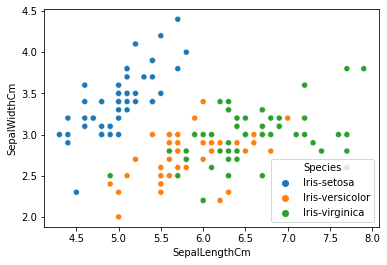

In [4]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris)

In [5]:
df1 = iris[['SepalLengthCm', 'SepalWidthCm','Species']]
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).copy()

In [7]:
from sklearn.naive_bayes import GaussianNB

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

GaussianNB()

/Users/followblindly/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


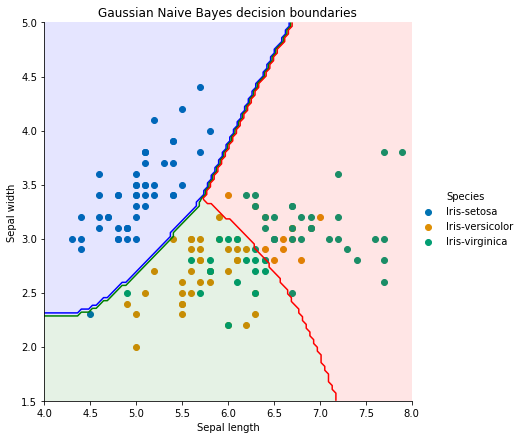

In [11]:
# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']

g = sns.FacetGrid(iris, hue="Species", size=6, palette = 'colorblind') .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm',)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

## Reference

[1]$\ \ \ \$Sicotte, X. B. (2018, June 22). Xavier Bourret Sicotte. Gaussian Naive Bayes Classifier: Iris data set - Data Blog. https://xavierbourretsicotte.github.io/Naive_Bayes_Classifier.html. 